In [28]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Reading the csv file by pandas
df=pd.read_csv('tmdb.movies.csv',usecols=['genre_ids','id','original_language','original_title','popularity','release_date','title',
                                          'vote_average','vote_count'])

In [30]:
# Let's see the dataframe
df.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [31]:
# Let's have some info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [32]:
#let's check the shape of dataframe
len(df)

26517

In [33]:
# Let's check duplicated data
df.duplicated().sum()

1020

We found 1020 rows are duplicated, we will remove them.

In [34]:
df=df.drop_duplicates()
len(df)

25497

We could see here that the are no null values in the dataframe.
Let's have some insights

In [35]:
# Let's check the unique languages we have in our dataframe
df['original_language'].unique()

array(['en', 'nl', 'es', 'ja', 'sv', 'de', 'fr', 'cn', 'it', 'ru', 'zh',
       'hi', 'no', 'ko', 'da', 'fi', 'pl', 'te', 'hu', 'tr', 'pt', 'he',
       'fa', 'th', 'cs', 'et', 'tl', 'lt', 'xx', 'bs', 'ar', 'is', 'el',
       'mr', 'hr', 'ro', 'sr', 'uk', 'nb', 'hz', 'ca', 'bg', 'sl', 'lv',
       'si', 'ab', 'ta', 'bo', 'id', 'sq', 'bn', 'gu', 'lo', 'ne', 'kk',
       'hy', 'ps', 'kn', 'vi', 'ku', 'ka', 'ml', 'ur', 'mi', 'eu', 'sn',
       'cy', 'ha', 'ky', 'yi', 'pa', 'xh', 'cr', 'sw', 'af', 'dz'],
      dtype=object)

In [36]:
# Let's check what are the most lanaguages of movies
df['original_language'].value_counts().sort_values(ascending=False)

en    22384
fr      483
es      439
ru      295
ja      244
      ...  
cy        1
sw        1
yi        1
hy        1
mi        1
Name: original_language, Length: 76, dtype: int64

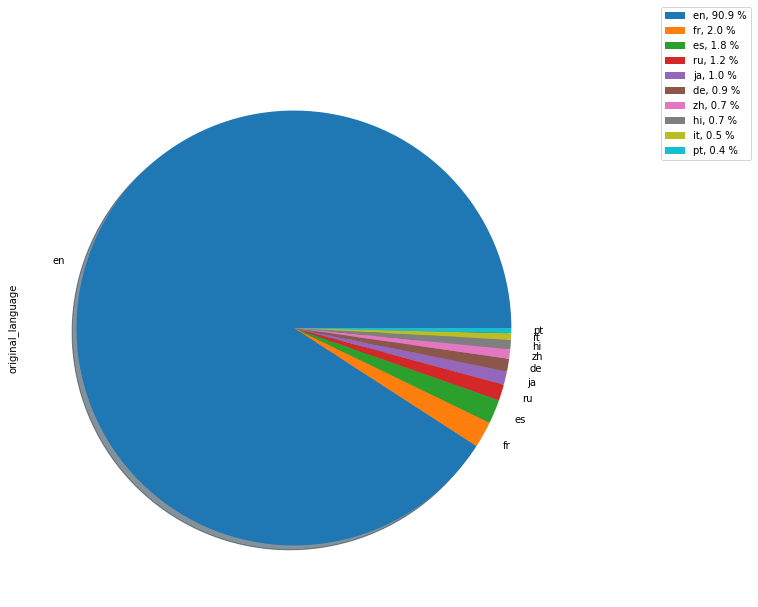

In [63]:
df_languages_count=df['original_language'].value_counts().sort_values(ascending=False)[:10]


# Let's visualize the the number of languages using pie chart

fig1, ax1 = plt.subplots(figsize=(15,10))
df_languages_count.plot(kind='pie',subplots=True,shadow=True)
percents = df_languages_count.to_numpy() * 100 / df_languages_count.to_numpy().sum()
plt.legend( bbox_to_anchor=(1.35,1.1), loc='upper right',
            labels=['%s, %1.1f %%' % (l, s) for l, s in zip(df_languages_count.index,percents)])

plt.show()

In [38]:
df['release_date']=pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          25497 non-null  object        
 1   id                 25497 non-null  int64         
 2   original_language  25497 non-null  object        
 3   original_title     25497 non-null  object        
 4   popularity         25497 non-null  float64       
 5   release_date       25497 non-null  datetime64[ns]
 6   title              25497 non-null  object        
 7   vote_average       25497 non-null  float64       
 8   vote_count         25497 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.9+ MB


In [39]:
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [40]:
# Constructa new column for release date to be in years
df['year']=pd.DatetimeIndex(df['release_date']).year

In [41]:
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010


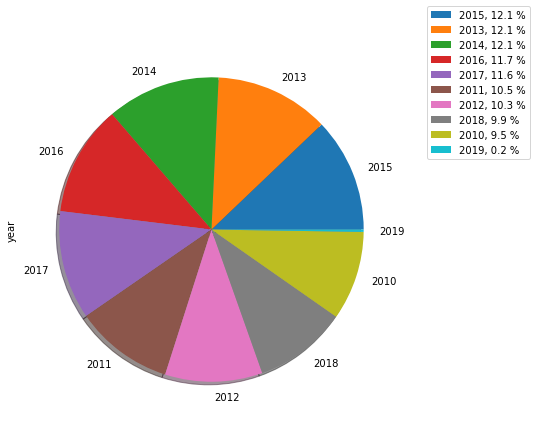

In [59]:
# Let's check what is year of the most movies in the dataset
df_year_counts=df['year'].value_counts().sort_values(ascending=False)[:10]


fig1, ax1 = plt.subplots(figsize=(10,7))
df_year_counts.plot(kind='pie',subplots=False,shadow=True)
percents = df_year_counts.to_numpy() * 100 / df_year_counts.to_numpy().sum()
plt.legend( bbox_to_anchor=(1.35,1.1), loc='upper right',
            labels=['%s, %1.1f %%' % (l, s) for l, s in zip(df_year_counts.index,percents)])

plt.show()

In [43]:
df.groupby('year')['vote_count'].sum().sort_values(ascending=False)

year
2016    577981
2014    576557
2015    535120
2013    528332
2017    521098
         ...  
1965         4
1939         3
1936         3
1981         1
2020         1
Name: vote_count, Length: 66, dtype: int64

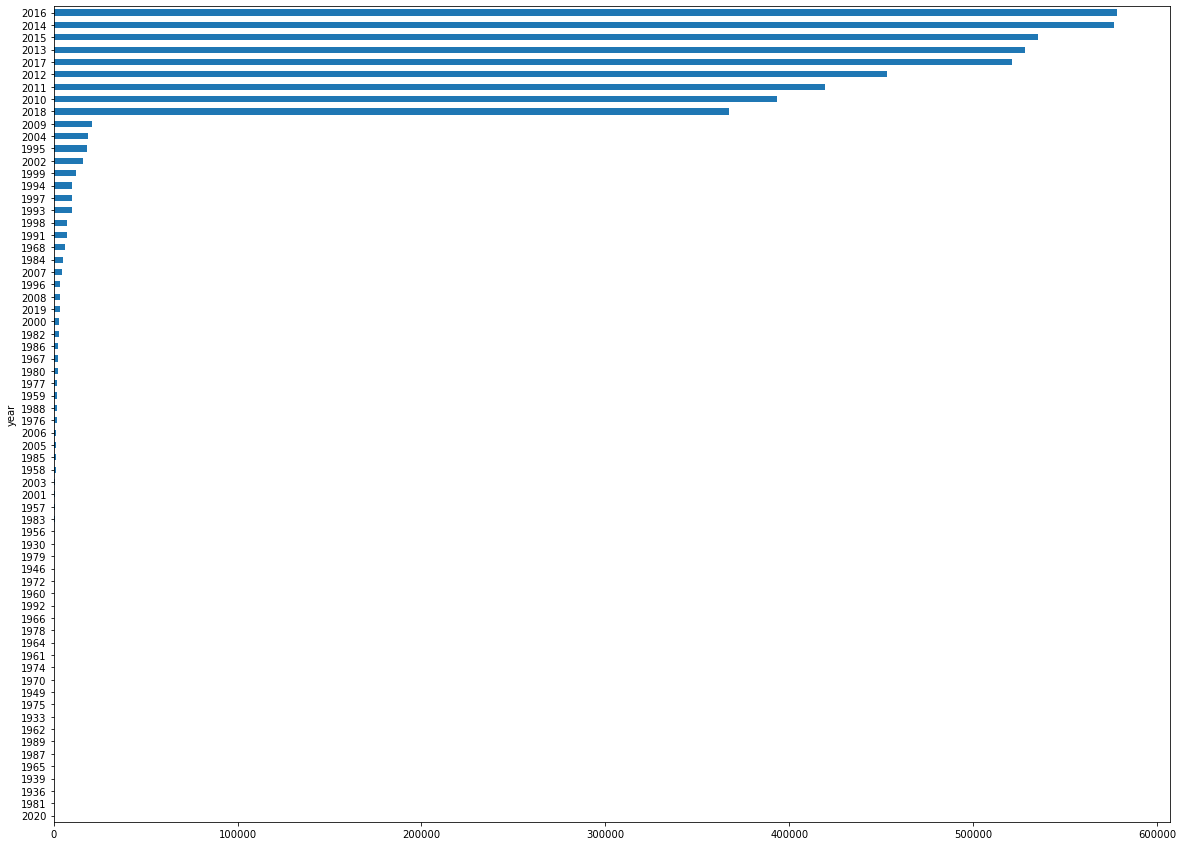

In [46]:
# Check the total number of votes for each year
df_year_vote_count=df.groupby('year')['vote_count'].sum().sort_values(ascending=True)

fig1, ax1 = plt.subplots(figsize=(20,15))

df_year_vote_count.plot(kind='barh')
plt.show()

Here we can see that year 2016 has the most hight vote counts

In [47]:
df.groupby('year')['vote_average'].mean().sort_values(ascending=False)

year
1936    8.700000
1994    8.200000
1957    8.100000
1978    8.100000
1958    8.050000
          ...   
1965    5.500000
1974    5.400000
2005    5.366667
1989    4.150000
2020    0.000000
Name: vote_average, Length: 66, dtype: float64

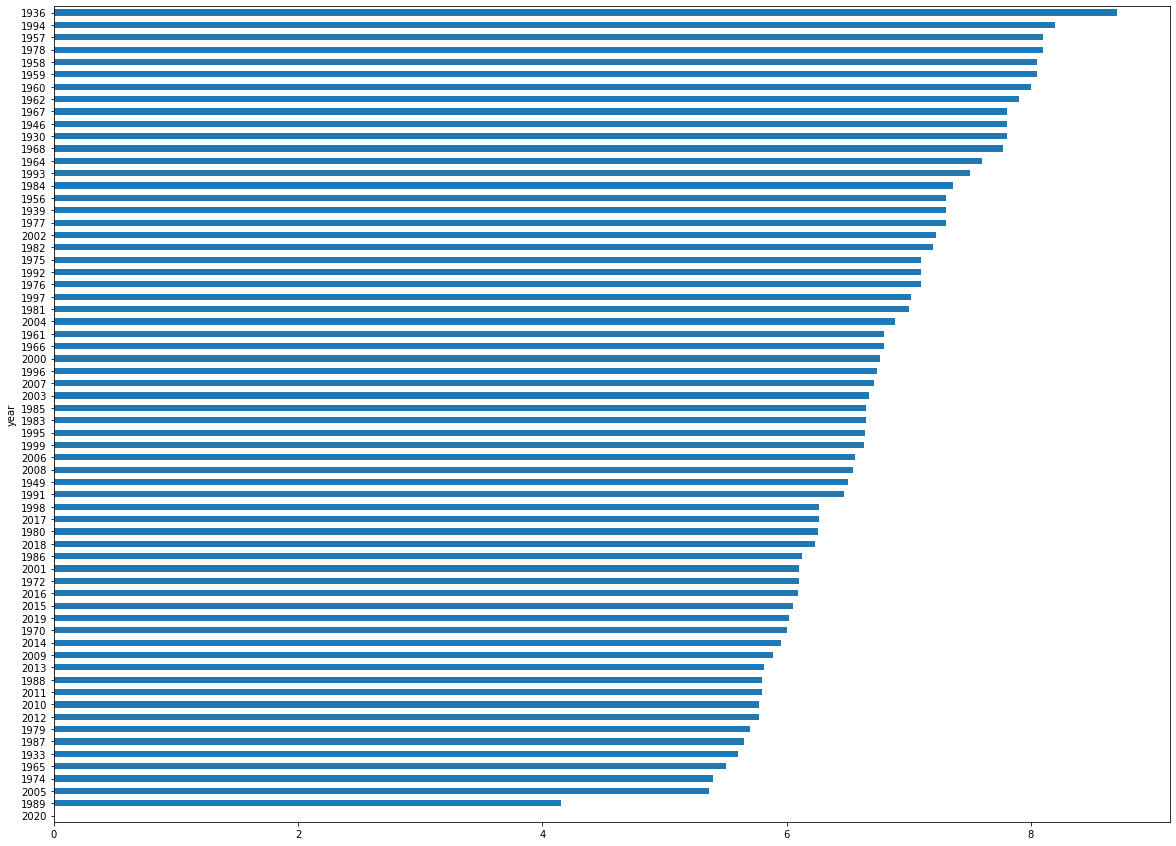

In [50]:
# Check the highest average rating for each year
df_year_vote_avg=df.groupby('year')['vote_average'].mean().sort_values(ascending=True)

fig1, ax1 = plt.subplots(figsize=(20,15))

df_year_vote_avg.plot(kind='barh')
plt.show()

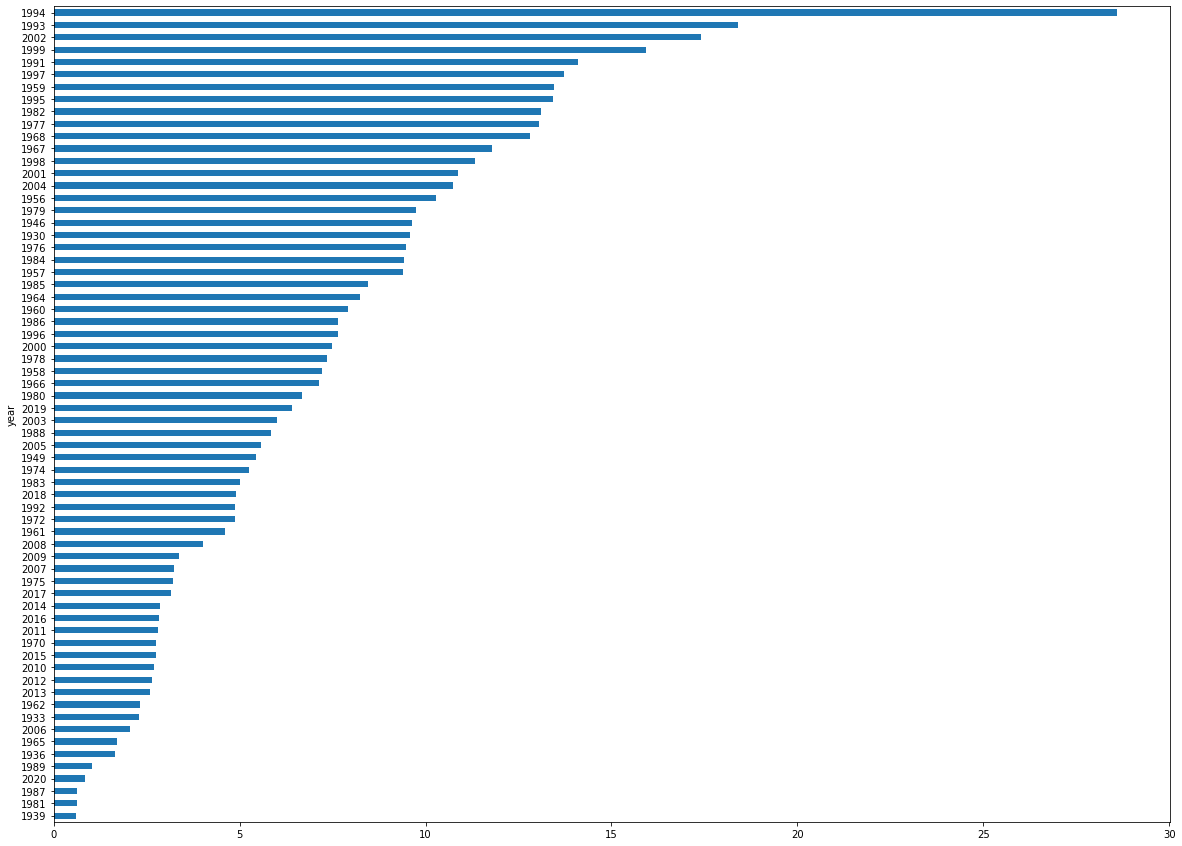

In [20]:
# Check the highest popularity for each year
df_year_popularity_avg=df.groupby('year')['popularity'].mean().sort_values(ascending=True)

fig1, ax1 = plt.subplots(figsize=(20,15))

df_year_popularity_avg.plot(kind='barh')
plt.show()

In [21]:
# Check the most 5 popular movies
df.sort_values(by='popularity', ascending=False)['title'][:5]

23811                       Avengers: Infinity War
11019                                    John Wick
23812            Spider-Man: Into the Spider-Verse
11020    The Hobbit: The Battle of the Five Armies
5179                                  The Avengers
Name: title, dtype: object

In [22]:
# Check the most 5 popular movies in year 2016
df[df['year']==2016].sort_values(by='popularity', ascending=False)['title'][:5]

17381             X-Men: Apocalypse
17382    Captain America: Civil War
17383                      Deadpool
17384                Doctor Strange
17387      The Light Between Oceans
Name: title, dtype: object

In [23]:
# Check the most 5  high rated movies
df.sort_values(by='vote_average', ascending=False)['title'][:5]

12835    OJ: Trial of the Century
16532              Psychoacoustic
16521                  Afterimage
16522                      Healed
16523                    SelectED
Name: title, dtype: object